# Correlation Heatmap of Running Metrics

<a id='section_id3'></a>

### Computational Rules: 

- `Document the proces, not just the results`
    - Both in the [Getting Started](getting_started.ipynb#section_id) notebook and here I explained step by step how I got to the data being plotted in the final plot. I used the first notebook to primarily clean the data, change variable types, and add new columns. Here, I explain the steps in getting the plot ready from some of the function parameters to on some of the annotations. In particular, I explain how I created the gold border and how I used for loops and conditions to only highlight certain squares. I finally talk about the plots and what the results might mean.

Going to our heatmap, I though that this would be a good choice to view correlations of a running metrics with. A heatmap can provide pretty direct and visual cues on what metrics are highly correlated with each other. From my days in Kinesiology, the body is a chain, and changes in certain areas can have downstream affects elsewhere. I wanted to see if any running metrics are linked and see what light that could shed for us.

Here I import my libraries and read in my csv that is needed for the heatmap

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [12]:
df_run_heatmap = pd.read_csv('./csv/df_run_heatmap.csv')

To get the correlations, I have to take the pandas correlation method of our `df_run_heatmap`. This is what we will pass in to our searborn heatmap method to create the plot. I wanted to include the annotations so anybody could see the correlation values and how strong they are. In order to enhance this, I used some nested for loops to loop through the correlation matrix and highlight certain values that were significantly correlated. For the purposes of this assignment, I decided any correlation value that was more than 0.7 (absolute value taken into consideration), would be highlighted. Usually we would only say something is highly correlated if it is above 0.8, but since there were no values that high (they were close), I made an exception for this assignment.

To create the highlighted box, I first create a patch using the `patches` module from `matplotlib`. This will be our border surrounding the significant values, and will be used in our legend. We then have to loop over our list of columns twice with one loop inside the other. This allows us to get the index values as coordinates that we can use to obtain values from our correlation matrix using `.iloc`. 

Two checks are needed here. The first `if` condition basically checks and makes sure we have not already seen this combination of metrics already. What you will see in the heatmap is that some of the coordinates are repeated (cadence vs. air power, and air power vs. cadence). I did not want to double highlight, so I only made sure to highlight one combination. The second condition checks if the value is greater than or equal to 0.7 while also ensuring we are leaving the diagonal boxes alone (where correlation is perfect due to comparing same metric i.e. cadence vs cadence). 

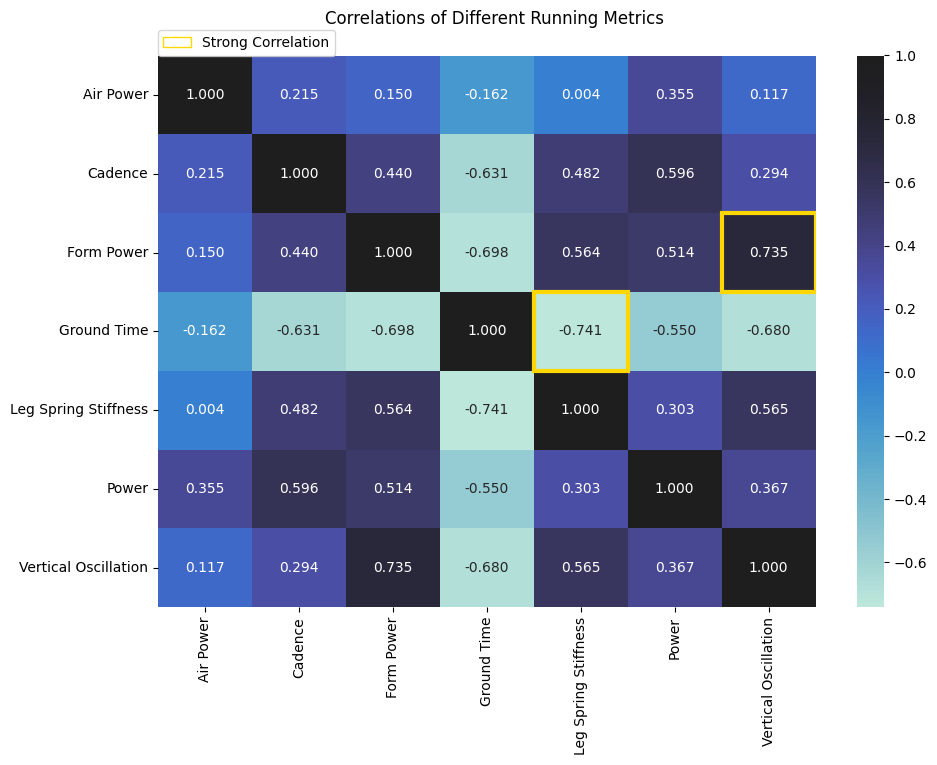

In [13]:
corr = df_run_heatmap[['Air Power', 'Cadence', 'Form Power', 'Ground Time', 'Leg Spring Stiffness', 'Power', 'Vertical Oscillation']].corr()
golden_patch = mpatches.Patch(edgecolor='gold', facecolor='none', label='Strong Correlation')

fig, ax = plt.subplots(figsize=(10,8))

ax_heat = sns.heatmap(data=corr, ax=ax, annot=True, center=True, fmt='.3f')

## highlight cells
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if j > i:
              val = corr.iloc[i, j]
              if abs(val) >= 0.7 and i != j:
                     ax_heat.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='gold', lw=3))



plt.suptitle('Correlations of Different Running Metrics')
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.legend(handles=[golden_patch],loc=(0,1))
plt.show()

The results give us a clue into some things that the subject may be able to highlight or improve upon with their running workouts. First, I see a strong negative correlation between ground time and leg spring stiffness, showing that as leg spring stiffness increases, ground time decreases, and this is a good thing. The leg spring stiffness measures how much bounce or spring in each step the subject has, and you typically want to have this bounce as you dont want to be on the ground for that long. This will slow the subject down. This is what ground time is measuring, how long the subject's foot is on the ground for. The subject could focus on improving this leg spring and therefore reducing ground contact time which might give way to being faster or more efficient while running. Certain drills like plyometrics or strength training for the lower body can help with this and give leg muscles more strength to take flight off the ground.

Second, I see a strong positive correlation between vertical oscillation and form power. Vertical oscillation being the amount your torso moves while running, and form power being the amount of power not contributing to forward motion. This makes sense because the more your torso moves, it will contribute to wasted power or energy going everywhere else except the place it needs to go. So it all ties in to being able to have good running form, like not bobbing up and down too much or swinging your arms too far side to side. This can have implications as far as speed and efficiency, and could be some thing to work on in the future if it ever becomes something that needs to be addressed. 

One area that had a surprising correlation lower than 0.7 was power and cadence. I would expect that as power goes up, cadence would go up too. However, it would depend on running style. If your stride starts to change, like if it lengthens, then your cadence will not be as high. This could be a good thing if the subject is training to improve stride length especially for long distances. So for future sessions, it might be important to track how these correlate and ensure to focus on stride length when running long distances.

Another area that had a surprising correlation was the weak positive correlation between leg spring stiffness and cadence. When the cadence is high, I would assume that more steps are being taken, and for that reason, one would need more bounce in their step. the correlation here for the subject was low, leading me to wonder what the subject's form is like while running. The way the subject runs some times could be inefficient and could be improved upon. Perhaps even going to a specific lab or sports medicine specialist could measure and analyze running form on a treadmill to see if there are visual inefficiencies and offer tips for improvement. 